<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tarea 2: Pregunta 1</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

In [12]:
# librerias pregunta 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Visualizacion de datos usando PCA

El objetivo de este problema es generar una herramienta de visualizacion usando PCA para el clustering realizado en la pregunta 1 de la Tarea 1.

Considere nuevamente la base de datos digitos de ``sklearn.datasets.load_digits()``. 

### Preguntas:
1. Normalice los datos usando la funcion ``sklearn.preprocessing.StandardScaler`` y centre el conjunto de datos, es decir sustraiga la media.
2. Calcule la descomposicion en valores singulares de los datos usando ``numpy`` o ``scipy``.
3. Grafique en un grafico de barras la contribucion de las valores singulares y el acumulado. Haga observaciones acerca de la distribucion.
4. Proyecte los datos en el espacio de las 2 primeras componentes principales.
5. Use k_means_fit para obtener clusters, los representantes y las etiquetas.
6. Grafique los datos y los centroides en el espacio de las 2 primeras componentes. Comente e interprete el grafico

In [28]:
# 1. Centre los datos, es decir  sustraiga la media
from sklearn.preprocessing import StandardScaler
digits = datasets.load_digits()
X = digits.data
Y = digits.target 
# your code here

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# 2. Calcule la descomposicion en valores singulares de los datos usando ``numpy`` o ``scipy``

# your code here
print(X.shape)

U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)

print("X_scaled:", X_scaled.shape)
print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

(1797, 64)
X_scaled: (1797, 64)
U shape: (1797, 64)
S shape: (64,)
Vt shape: (64, 64)


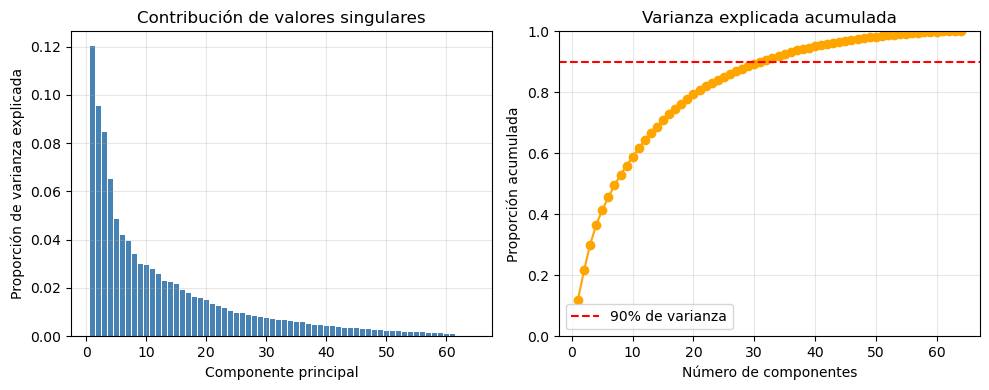

In [30]:
# 3. Grafique en un grafico de barras la contribucion de los valores singulares y la razon acumulada de los valores singulares

import numpy as np
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(10,4))

# your code here
n = X_scaled.shape[0]
explained_variance = (S**2) / (n - 1)
explained_ratio = explained_variance / explained_variance.sum()
explained_cum = np.cumsum(explained_ratio)

ax1 = fig1.add_subplot(1,2,1)
ax1.bar(np.arange(1, len(S)+1), explained_ratio, color='steelblue')
ax1.set_title('Contribución de valores singulares')
ax1.set_xlabel('Componente principal')
ax1.set_ylabel('Proporción de varianza explicada')
ax1.grid(alpha=0.3)


ax2 = fig1.add_subplot(1,2,2)
# your code here
ax2.plot(np.arange(1, len(S)+1), explained_cum, marker='o', color='orange')
ax2.axhline(0.9, color='red', linestyle='--', label='90% de varianza')
ax2.set_title('Varianza explicada acumulada')
ax2.set_xlabel('Número de componentes')
ax2.set_ylabel('Proporción acumulada')
ax2.set_ylim(0, 1)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


YOUR ANSWER HERE

El gráfico de la izquierda muestra la proporción de varianza explicada por cada componente principal.

Se observa que las primeras componentes tienen los valores singulares más altos,lo que indica que capturan la mayor parte de la información del conjunto de datos.

En el gráfico de la derecha se muestra la varianza explicada acumulada: con unas 15 a 20 componentes ya se alcanza alrededor del 90% de la varianza total.

Esto significa que el dataset puede representarse de forma bastante precisa en un espacio de menor dimensión, reduciendo ruido y redundancia sin perder demasiada información.


In [43]:
# 4. Proyecte los datos en el espacio de las 2 primeras componentes principales

# Número de componentes principales
n_componentes = 2

# Proyectar los datos en el espacio de las primeras n_components
# your code here
V = Vt.T
W = V[:, :n_componentes]
X_pca_2d = X_scaled @ W

In [44]:
def calcular_etiquetas(X,Z):
    n, N = X.shape
    n, k = Z.shape
    c = np.zeros(N, dtype=np.int64)
    for i in range(N):
        c[i] = np.argmin([np.linalg.norm(X[:,i]-Z[:,j]) for j in range(k)])
    return c

def calcular_representantes(X,c,k):
    n = X.shape[0]
    Z = np.zeros((n,k))
    for j in range(k):
        cond = c==j
        Z[:,j] = np.sum(X[:,cond], axis=1)/np.sum(cond)
    return Z

def compute_Jclust(X, Z, c):
    n, N = X.shape
    n, k = Z.shape
    J = 0
    for j in range(N):
        J += np.linalg.norm(X[:,j]-Z[:, c[j]])**2
    return J/N
        
def k_means_fit(X, Z0, NITERMAX):
    n, N = X.shape
    n, k = Z0.shape
    c = np.zeros(N,dtype=np.int64)
    Jclust = []
    i = 0
    while i<=NITERMAX:
        # 1. Encontrar el vector de asignacion dado representantes fijos
        cnew  = calcular_etiquetas(X, Z0)
        # 2. Encontrar representantes dado etiquetas fijas
        Z0 = calcular_representantes(X, cnew, k)
        
        if (c == cnew).all():
            break
        c = cnew
        Jk = compute_Jclust(X, Z0, c)
        Jclust.append(Jk)
        i +=1
    return Z0, cnew, Jclust, i


# 5. Use k_means_fit para obtener clusters, los representantes y las etiquetas

# your code here
rng = np.random.default_rng(42)

X_km = X_pca_2d.T
k = 10
NITERMAX = 100


idx0 = rng.choice(X_km.shape[1], size=k, replace=False) # representantes iniciales aleatorios
Z0 = X_km[:, idx0]

Z, c, Jclust, iters = k_means_fit(X_km, Z0, NITERMAX)

print(Jclust)

assert Jclust[-1]< 1e-3,  "El ultimo valor de tu funcion de costo debe ser menor que 1e-3"

[2.4026291611497803, 2.089616401325486, 2.0186498551634857, 1.9752622774997333, 1.9061267626365364, 1.853173489479851, 1.8206257161012689, 1.7986269517261082, 1.7724542303199968, 1.7487668532341583, 1.732308379318943, 1.717316506097882, 1.7097588214612405, 1.7042795862161457, 1.7007592801618747, 1.692711601143745, 1.6833299690050363, 1.6726978745340575, 1.6661501193450634, 1.660963362445996, 1.653555532357068, 1.64150609988974, 1.628952989876717, 1.6168578079377798, 1.6074537153021855, 1.600665659873757, 1.5939322319542704, 1.5867134965673584, 1.5813995243336452, 1.5766292649272353, 1.5734062537020852, 1.569874765234911, 1.5678252705315738, 1.5676957746023394, 1.5676565503497615, 1.5676406563649687]


AssertionError: El ultimo valor de tu funcion de costo debe ser menor que 1e-3

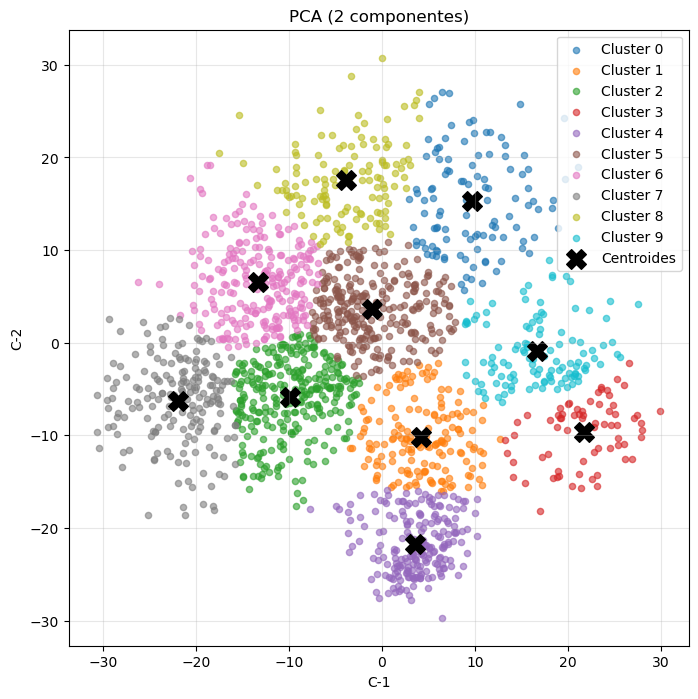

In [42]:
# 6. Grafique los datos y los centroides en el espacio de las 2 primeras componentes
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

for i in range(10):
    # scatter plot de los datos proyectados
    # your code here
    plt.scatter(
        X_pca_2d[c == i, 0],
        X_pca_2d[c == i, 1],
        s=20,
        alpha=0.6,
        label=f"Cluster {i}"
    )

# scatter plot de los centroides Z
# your code here
plt.scatter(
    Z[0, :],
    Z[1, :],
    s=200,
    c="black",
    marker="X",
    label="Centroides"
)

plt.title("PCA (2 componentes)")
plt.xlabel("C-1")
plt.ylabel("C-2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Comente acerca del grafico

Cada punto representa una imagen del dataset digits proyectada en las 2 primeras componentes principales (PCA), que capturan la forma general de los dígitos. Los colores indican los grupos encontrados por K-Means y las X negras marcan los centroides de cada clúster.

Se observan zonas con buena separación y otras con superposición,
lo que refleja que algunos dígitos son visualmente parecidos (como 3, 5 y 8).

Aunque se pierde información al reducir a 2 dimensiones, la estructura general de los datos se conserva bien, mostrando que PCA + K-Means permite visualizar patrones y similitudes entre los dígitos manuscritos.


<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tarea 2: Pregunta 2</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

In [ ]:
## librerias pregunta 2
import numpy as np
# para calcular coordenadas en la base de wavelets de Haar
import matplotlib as mpl
import matplotlib.pyplot as plt
# !pip install soundfile
import soundfile

## Aproximación de señales de audio usando mínimos cuadrados

En este problema usaremos la librería ``soundfile`` para aproximar una señal de audio usando mínimos cuadrados.

A continuación mostramos la señal de audio que aproximaremos. Observe que la señal se muestrea con ``num_t = 44000`` valores.

**No modifique ninguna de estas variables al realizar la tarea**

In [ ]:
# frecuencia de muestreo (Hz)
fs = 44100
# periodo de muestreo
dt = 1/fs
# número de instantes de muestreo
num_t = 44000
# tiempo de muestreo
t_max = dt * num_t
# instantes de muestreo
t = np.array([ I * dt for I in range(num_t) ])
# señal de audio
#   frecuencia mínima y máxima
f_min = 250 
f_max = 1500
#   forma de onda
s = lambda t : 4 * t * (1-t) * np.cos(2 * np.pi * (f_min * t + f_max * (t_max/2 - t/3) * t ** 2))
#   muestras en el tiempo 
y = s(t)
#   archivo de audio
soundfile.write('MDS3120_T2_AUDIO_SIGNAL.wav', y, fs)

plt.figure(figsize=(8, 8))
plt.plot(t, s(t), label='$u$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.05, +1.05 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Queremos aproximar esta señal usando pulsos rectangulares y pulsos triangulares como se muestran en la figura. Denotamos el pulso rectangular como $v_R$ y el pulso triangular como $v_T$. Observe que el pulso rectangular tiene asociada la frecuencia $f_R$ y el número $N_R$ de pulso, mientras que el pulso triangular tiene asociada la frecuencia $f_T$ y el número de pulsos $N_T$. Estas últimas están en las variables ``f_vr``, ``num_vr``, ``f_vt`` y ``num_vt``.

**No modifique ninguna de estas variables al realizar la tarea**

In [ ]:
# pulso triangular
#   frecuencia
f_vt = 1250
#   número de pulsos
num_vt = int(f_vt * t_max) + 1
#   función
vt = lambda t : np.maximum(0.0, 1 - 2 * f_vt * np.abs(t))
# pulso rectangular
#   frecuencia
f_vr = 500
#   número de pulsos
num_vr = int(f_vr * t_max) + 1
#   función
vr = lambda t : np.where(np.abs(t) > 0.5 / f_vr, 0.0, 0.5 * np.sign(t))

print('Frecuencia pulso triangular:         ', f_vt)
print('Numero pulsos triangulares:          ', num_vt)
print('Frecuencia pulso rectangular:        ', f_vr)
print('Numero pulsos rectangulares:         ', num_vr)

print('Numero total de pulsos:              ', num_vt + num_vr)

# figura
_t = np.linspace(-2E-3, 2E-3, 500)
plt.figure(figsize=(8, 8))
plt.plot(_t, vr(_t), label='$v_R$', linewidth=2, color='r')
plt.plot(_t, vt(_t), label='$v_T$', linewidth=2, color='b')
plt.xlim([ -2E-3, +2E-3 ])
plt.ylim([ -1.05, +1.05 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Buscamos aproximar la señal original $s$ usando una superposición de traslaciones de los pulsos $v_R$ y $v_T$ de la forma
$$
    s(t) \approx \sum_{k=0}^{N_T-1} x_i v_T(t - k/f_R) + \sum_{k=0}^{N_R-1} x_i v_R(t - k/f_R).
$$

### Preguntas:
Escriba un código que ensamble una matriz $A$ de $44000 \times 1747$ donde
1. Las primeras ``num_vt = 1248`` columnas corresponden a la función ``v_T`` evaluada en ``t - k/f_T`` con $k \in \{0, \ldots 1247\}$.
2. Las siguientes ``num_vr = 499`` columnas corresponden a la función ``v_R`` evaluada en ``t - k/f_R`` con $k \in \{1248, \ldots 1746\}$.

In [ ]:
# your code here
raise NotImplementedError

assert A.shape[0] ==44000 and A.shape[1] == 1747, "El tamaño de la matriz es incorrecto"

Usando el módulo ``soundfile`` determine la señal de audio generada por un vector $x_1$ tal que
$$
    x_{1,i} = \begin{cases}
        1 & i\in\{0,\ldots, 1247\}\\
        0 & \text{en otro caso}
    \end{cases}
$$
y otro vector $x_2$ tal que
$$
    x_{2,i} = \begin{cases}
        0 & i\in\{0,\ldots, 1247\}\\
        1 & \text{en otro caso}
    \end{cases}
$$
### Pregunta:
¿Cuál es la señal de audio más grave? ¿Cuál es más aguda?

**NOTA:** Si ``x`` es el vector de ``44000`` componentes y ``A`` es la matriz que ensambló en el punto anterior, entonces puede generar el archivo de audio con el comando ``soundfile.write('NOMBRE_ARCHIVO.wav', A @ x, fs)``.

In [ ]:
# your code here
raise NotImplementedError

YOUR ANSWER HERE

La matriz $A$ resultante de $44000\times 1150$ es de rango completo.

### Pregunta:
Resuelva el problema de mínimos cuadrados
$$
    \text{minimizar}\quad \|y - Ax\|_2^2
$$
usando la factorización QR para resolver las ecuaciones normales. Si $x^{\star}$ es la solución óptima, determine explícitamente el residuo, esto es,
$$
    \|y - A x^{\star}\|_2.
$$
Grafique además los valores de las componentes del vector $x^{\star}$.

In [ ]:
# your code here
raise NotImplementedError


### Pregunta:
Use el módulo ``soundfile`` para sintetizar la señal de audio generada por el vector $x^{\star}$ que encontró en el ítem anterior. Discuta las diferencias cualitativas entre la señal de audio original y su aproximación.

In [ ]:
# your code here
raise NotImplementedError

YOUR ANSWER HERE